<img src="photo_2018-10-31_16-04-39.jpg" height="420" width="420"  />

$$
C_{LL(i)}= {\frac 1{E\cdot B_e}}\left(\frac {W+a_i}{W-a_i}\right)^2
\left[
2.1630+12.219\left(\frac {a_i}W\right)
-20.065\left(\frac {a_i}W\right)^2
-0.9925\left(\frac {a_i}W\right)^3
+20.609\left(\frac {a_i}W\right)^4
-9.9314\left(\frac {a_i}W\right)^5
\right]
\qquad(A2.10) 
\\
\\
\boldsymbol{where:} \\
B_e \equiv B-\frac{(B-B_N)^2}B \;mm
\qquad\qquad\qquad\qquad\qquad\qquad(A2.11)
\\
\\
$$
___
$$
B \equiv\; 20 \;mm \\
B_N\equiv 0.2 \cdot \;B \\
E \equiv 190 000 \;MPa = 190 000 \;\frac N {{mm}^2} \\
W \equiv 40\;mm \\
$$

In [ ]:
class formula_A2_11:
    B= 20.
    BN= 0.2*B
    Be= B - (B-BN)**2/B
    E= 190000.
    W= 40.
    def Cc(self,ai):
        ai_w=ai/self.W
        return (2.1630 + 12.219*ai_w - 20.065*ai_w**2 - 0.9925*ai_w**3 + 20.609*ai_w**4 - 9.9314*ai_w**5) * \
            ( (self.W+ai)/(self.W-ai) )**2./(self.E*self.Be)
#

formula_A2_11().Cc(0.151550581328749)

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[18, 11]

In [ ]:
crack = np.loadtxt("crack-length_calc1.dat", dtype=np.float)

In [ ]:
#crk=[crack[1], A2.11(crack[1]+24.)]

A2_11=formula_A2_11()
crk=[]
for xx in crack:
    if xx[1]:
        crk.append([xx[1], A2_11.Cc(xx[1]+24.)])
crkk=np.asarray(crk)

#crkk_interp интерполятор массива crkk
crkk_interp = interp1d(crkk[:,0],crkk[:,1], bounds_error=False)
crkk_interp(crkk[:,0][0]).item(), crkk_interp(crkk[:,0][-1]).item(), crkk[:,0].size

In [ ]:
##TEST
plt.rcParams["figure.figsize"]=[18, 11]
plt.plot(crkk[:,0],crkk[:,1])
plt.xlabel('DELTA_A, mm')
plt.ylabel('Cc, mm/N    (A2.11)')
plt.grid()
plt.show()

In [ ]:
##TEST
print ("Min","Max","Size","Step")
print (crkk[:,0][0], crkk[:,0][-1], crkk[:,0].size, (crkk[:,0][-1]- crkk[:,0][0])/crkk[:,0].size)
print
test__X = np.arange(crkk[:,0][0], crkk[:,0][-1], (crkk[:,0][-1]- crkk[:,0][0])/crkk[:,0].size)
for _ in test__X:
    print [_, crkk_interp(_).item()]

In [5]:
force = np.loadtxt("FORCE_CMOD_calc1.dat", dtype=np.float)
force

array([[0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e-03, 1.73770e-03, 1.16225e+01],
       [2.00000e-03, 3.47545e-03, 2.32385e+01],
       ...,
       [9.98000e-01, 1.97705e+00, 1.57314e+03],
       [9.99000e-01, 1.97910e+00, 1.57241e+03],
       [1.00000e+00, 1.98115e+00, 1.57164e+03]])

In [6]:
force[:,1]*=2.0
force[:,2]*=2.0
force

array([[0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e-03, 3.47540e-03, 2.32450e+01],
       [2.00000e-03, 6.95090e-03, 4.64770e+01],
       ...,
       [9.98000e-01, 3.95410e+00, 3.14628e+03],
       [9.99000e-01, 3.95820e+00, 3.14482e+03],
       [1.00000e+00, 3.96230e+00, 3.14328e+03]])

In [8]:
#force_interp интерполятор массива force
force_interp = interp1d(force[:,1],force[:,2], bounds_error=False)
force_interp

In [ ]:
##TEST
#INST CMOD FORCE
plt.plot(force[:,1], force[:,2])
plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')
plt.grid()
plt.show()
force_interp([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

In [ ]:
##TEST
print ("Min","Max","Size","Step")
print (force[:,1][0], force[:,1][-1], force[:,1].size, (force[:,1][-1]- force[:,1][0])/force[:,1].size)
print
test__X = np.arange(force[:,1][0], force[:,1][-1], (force[:,1][-1]- force[:,1][0])/force[:,1].size)
for _ in test__X:
    print [_, force_interp(_).item()]

In [9]:
nz= crack[:,1].size-crkk[:,1].size
crack_cmode_interp = interp1d(crack[:,1][nz : ], force[:,1][nz : ], bounds_error=False)
crack_cmode_interp

In [ ]:
##TEST
plt.plot(crack[:,1][nz : ], force[:,1][nz : ])
plt.xlabel('DELTA_A, mm')
plt.ylabel('CMOD, mm')
plt.grid()
plt.show()
#
crack_cmode_interp([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])

In [25]:
def jpl(delta, eps):    
    cc_ = 1./crkk_interp(delta).item()
    cmode_ = crack_cmode_interp(delta).item()
    #force_ = force_interp(cmode_).item()

    x1_ = cmode_
    x2_ = force[:,1][-1]
    while True:
        y2_ = (x2_ - cmode_) * cc_ 
        f2_ = force_interp(x2_).item()
        #print "x1=%r x2=%r y2=%r f2=%r (y-f)=%r" % (x1_, x2_, y2_, f2_, y2_ - f2_)
        if (abs(y2_-f2_) / f2_) < eps: break
        if y2_ > f2_:
            dx_ = 0.5 * (x2_ - x1_)
            x2_= x1_ + dx_
        if y2_ < f2_:
            x1_ = x2_
            dx_ = dx_ * 0.5
            x2_= x1_ + dx_
        y2_ = (x2_ - cmode_) * cc_ 
        f2_ = force_interp(x2_).item()

    from scipy.integrate import quad
    q_ = quad(force_interp, force[:,1][0], x2_)[0] - y2_ * (x2_ - cmode_) * 0.5        

    return (cmode_, x2_, y2_ , q_)

jpl(1.0, 0.00001)

(3.3049594741390784,
 3.4844954046604335,
 3338.9810489846254,
 11197.801334650865)

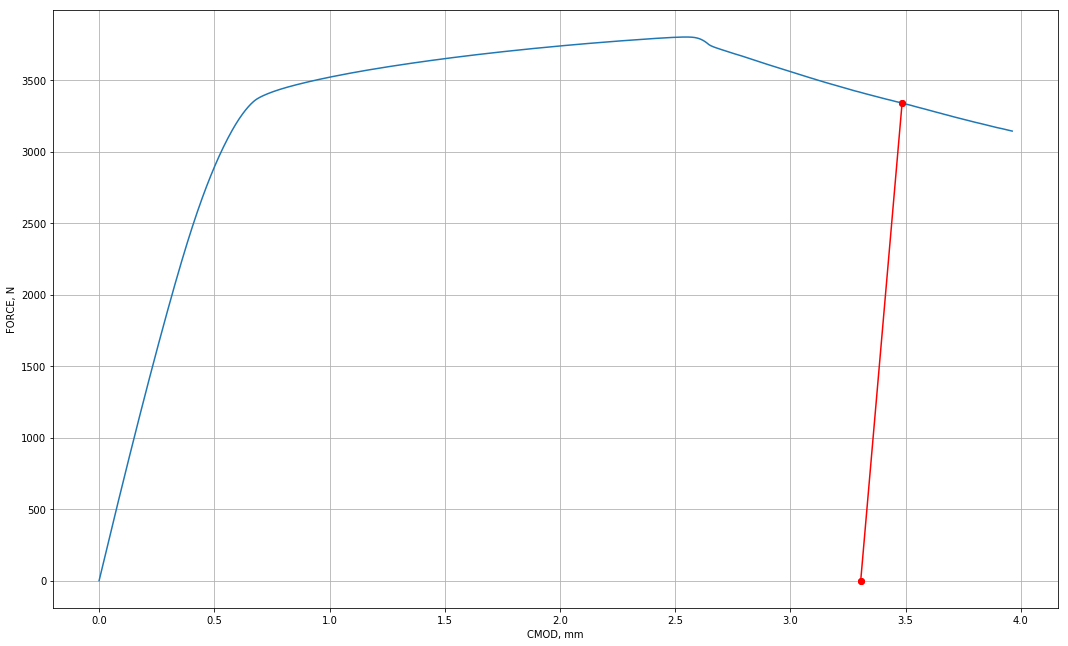

(3.3049594741390784,
 3.4844954046604335,
 3338.9810489846254,
 11197.801334650865)

In [26]:
##TEST jel()
plt.plot(force[:,1], force[:,2])
j_= jpl(1.0, 0.00001)

plt.plot(j_[0], 0.0, 'ro') # first point
plt.plot(j_[1], j_[2], 'ro') # second point
plt.plot([j_[0],j_[1]], [0.0, j_[2]], 'ro-')
"""
"""

plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')
plt.grid()
plt.rcParams["figure.figsize"]=[18, 11]
plt.show()
j_